<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-9 - Wait-Attention (Flat-Trend) - Gold - LSTM </h1> </html>

## Gold  - Period: 01/01/2024 - 30/06/2024
5-minutes time-frame
     
### Predictions of Flat-Trend
- Early-Stopping
- Loss function: BinaryCrossentropy
- Metrics: Accuracy and (F1, Precision, Recall)

### length of analysed history (sliding window)- 50 raws ago

#### dataset: 35232 rows (5-minutes)
#### use part of the dataset: 12000 rows, which is around 2 months
#### train / test = 90 /10

#### Parameters

epoch = 30

patience = 10

take-profit = $10

hours = 4

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [1]:
# For Google Colab only!

!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

'cat' is not recognized as an internal or external command,
operable program or batch file.


### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

______________________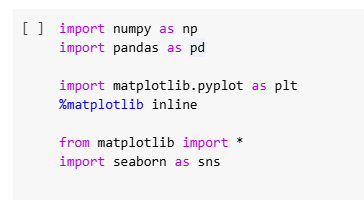

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns


In [3]:
#

_______________________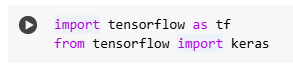

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
#

______________________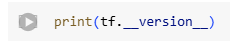

In [6]:
print(tf.__version__)

2.18.0


In [7]:
#

______________________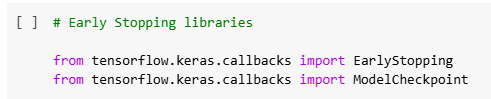

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [9]:
#

________________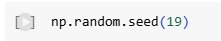

In [10]:
np.random.seed(19)

In [11]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [12]:
# Use code in this cell for Google Colab only

# Run the cell twice and upload 2 files:
# XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv
# XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv

from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

_________________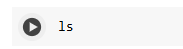

In [ ]:
ls

In [ ]:
# Here, you should see the 2 files mentioned above.

___________________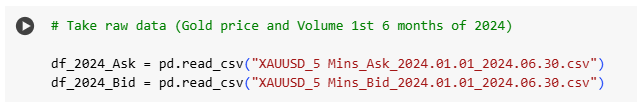

In [ ]:
df_2024_Ask = pd.read_csv("XAUUSD_5 Mins_Ask_2024.01.01_2024.06.30.csv")
df_2024_Bid = pd.read_csv("XAUUSD_5 Mins_Bid_2024.01.01_2024.06.30.csv")

print(df_2024_Ask.head(3))
print(df_2024_Ask.tail(3))


In [ ]:
#

______________________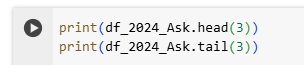

In [ ]:
#

________________________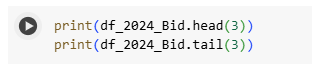

In [ ]:
print(df_2024_Bid.head(3))
print(df_2024_Bid.tail(3))


In [ ]:
#

<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

___________________________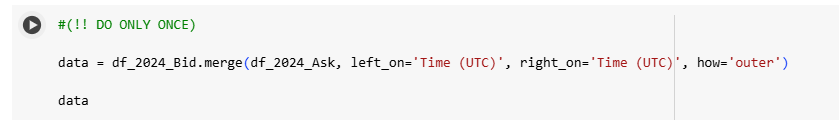

In [ ]:
data = df_2024_Bid.merge(df_2024_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')
data

In [ ]:
#

________________________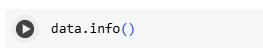

In [ ]:
data.info()

In [ ]:
#

In [ ]:
# No NaN elements !

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

_______________________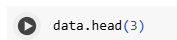

In [ ]:
data.head(3)

In [ ]:
#

__________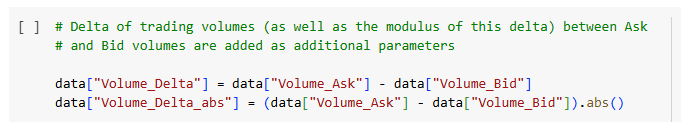

In [ ]:
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [ ]:
#

_______________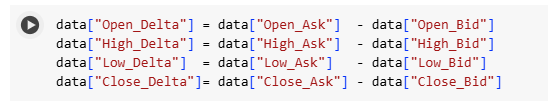

In [ ]:
data["Open_Delta"] = data["Open_Ask"] - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"] - data["High_Bid"]
data["Low_Delta"] = data["Low_Ask"]- data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]


In [ ]:
#

____________________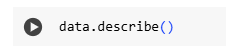

In [ ]:
data.describe()

In [ ]:
#

_______________________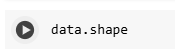

In [ ]:
data.shape

In [ ]:
#

_________________________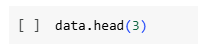

In [ ]:
data.head(3)

In [ ]:
#

<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

______________________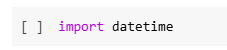

In [ ]:
import datetime

In [ ]:
#

_________________________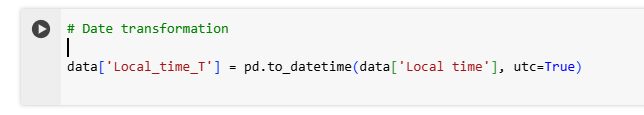

In [ ]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [ ]:
#

________________________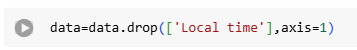

In [ ]:
data=data.drop(['Local time'], axis=1)


In [ ]:
#

_______________________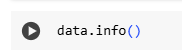

In [ ]:
data.info()

In [ ]:
#

<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('BRENT close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

In [ ]:
fig = plt.figure(figsize=(9, 4))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

In [ ]:
plt.figure(num=1,figsize=(10,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show();

In [ ]:
# Distribution has mostly positive values
# So Volume_Ask is usually greater than Volume_Bid,
# This corresponds to the upward trend in the first 6 months of 2024

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

_______________________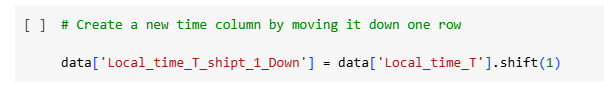

In [ ]:
data['Local_time_T_shipt_1_Down' ] = data['Local_time_T' ]. shift(1)


In [ ]:
#

______________________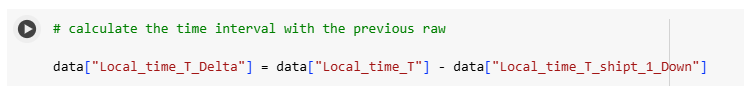

In [ ]:
data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

In [ ]:
#

________________________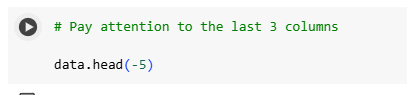

In [ ]:
data.head(-5)

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 2 cells using 'Ctrl' + 'Enter' </h4>








In [ ]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

data['Local_time_T_Delta'].iloc[0] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

In [ ]:
# find intervals which are longer than 5 minutes
# create a new DataFrame with the beginning of the new days

new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:05:00']
new_day['Local_time_T_Delta'].value_counts(sort=False)

In [ ]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 129, which is equal to the number of trading days during 6 first months of 2024

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# find intervals which are longer than 1 day
# create a new DataFrame with the beginning of the new weeks

new_week = data[['Local_time_T_Delta']][data['Local_time_T_Delta'] > '1 days 00:00:00']
new_week["Local_time_T_Delta"].value_counts(sort=False)

In [ ]:
# We found the weekend duration when there is no trading in Gold.
# Total such intervals - 27, which is equal to the number of weekends during 6 first months of 2024

____________________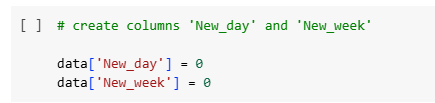

In [ ]:
data['New_day'] = 0
data['New_week'] = 0

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Fill in "1" when the new day starts

data.loc[data["Local_time_T_Delta"] > '0 days 00:05:00', 'New_day'] = 1

__________________________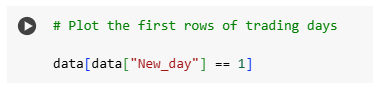

In [ ]:
data[data["New_day"]  == 1]

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Fill in "1" when the new week starts

data.loc[data["Local_time_T_Delta"] > '1 days 00:00:00', 'New_week'] = 1

____________________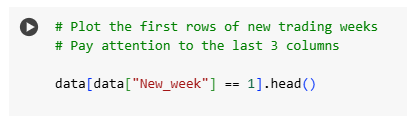

In [ ]:
data[data["New_week"] == 1].head()

In [ ]:
#

______________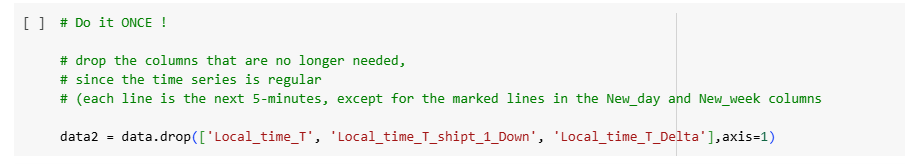

In [ ]:
data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'], axis=1)


In [ ]:
#

_____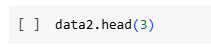

In [ ]:
data2.head(3)

In [ ]:
#

____________________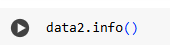

In [ ]:
data2.info()

In [ ]:
#

__________________________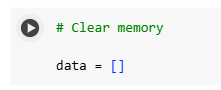

In [ ]:
data = []

In [ ]:
#

## We will look for rows with potential take-profit = $10


- create 'High_Bid' and 'Low_Ask' 4 hours ahead
- that is, the maximum holding of a position is no more than 4 hours
- 4 hours is 48 of 5-minute intervals


______________________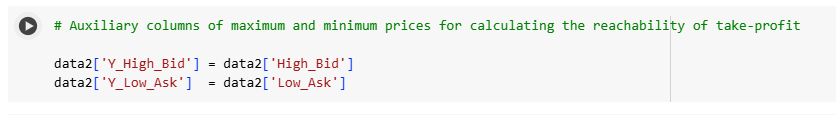

In [ ]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Ask']


In [ ]:
#

___________________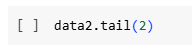

In [ ]:
data2.tail(2)

In [ ]:
#

<html> <h3 style="font-style:italic; color:blue;"> Data Normalisation </h3> </html>

In [ ]:
# We do price normalisation simply by dividing all prices by 1000 (for Gold)
# It is not essential that the normalised prices were in the range between [0,1]
# It is more important that the variables were approximately of the same order

In [ ]:
# Only applicable to Volumes and Deltas:

# normalisation
# data=(data-data.min())/(data.max()-data.min())

##### Find Max and Min for Prices, Volumes and Deltas

In [ ]:
# Max price is Max High_Ask
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

_______________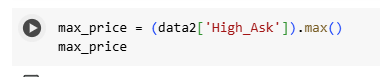

In [ ]:
max_price = (data2['High_Ask']).max()
max_price

In [ ]:
#

__________________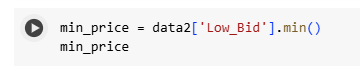

In [ ]:
min_price = (data2['Low_Bid']).min()
min_price

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 2 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
max_volume = max(max(data2['Volume_Bid']), max(data2['Volume_Ask']))
max_volume

In [ ]:
max_Delta = max(max(data2['Open_Delta']), max(data2['High_Delta']), max(data2['Low_Delta']), max(data2['Close_Delta']))
max_Delta

____________________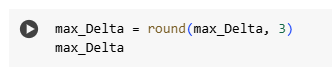

In [ ]:
max_Delta = round(max_Delta, 3)
max_Delta

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
min_Delta = min(min(data2['Open_Delta']), min(data2['High_Delta']), min(data2['Low_Delta']), min(data2['Close_Delta']))
min_Delta

______________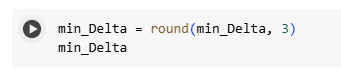

In [ ]:
min_Delta = round(min_Delta, 3)
min_Delta

In [ ]:
#

______________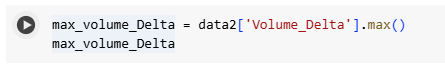

In [ ]:
max_volume_Delta = data2['Volume_Delta'].max()
max_volume_Delta

In [ ]:
#

__________________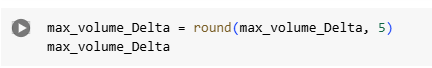

In [ ]:
max_volume_Delta = round(max_volume_Delta, 5)
max_volume_Delta

In [ ]:
#

______________________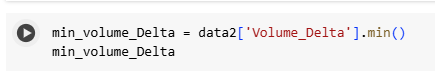

In [ ]:
min_volume_Delta = data2['Volume_Delta'].min()
min_volume_Delta

In [ ]:
#

_________________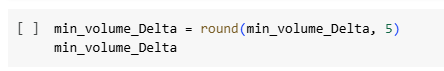

In [ ]:
min_volume_Delta = round(min_volume_Delta, 5)
min_volume_Delta

In [ ]:
#

_________________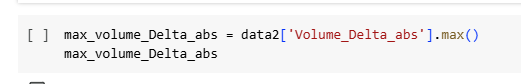

In [ ]:
max_volume_Delta_abs = data2['Volume_Delta_abs' ].max()
max_volume_Delta_abs

__________________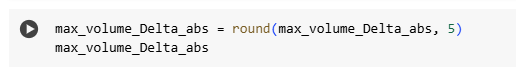

In [ ]:
max_volume_Delta_abs = round(max_volume_Delta_abs, 5)
max_volume_Delta_abs

In [ ]:
#

__________________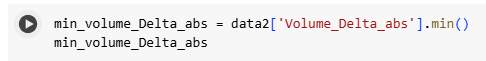

In [ ]:
min_volume_Delta_abs = data2['Volume_Delta_abs' ].min()
min_volume_Delta_abs

In [ ]:
#

In [ ]:
# min_volume_Delta_abs = 0
# Therefore, the normalization formula for volume_Delta_abs is simplified

#### Normalise
Run each cell only one time !

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 5 cells with code using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Цены просто делим на 100

data2['Open_Bid']   = data2['Open_Bid']   / 1000
data2['High_Bid']   = data2['High_Bid']   / 1000
data2['Low_Bid']    = data2['Low_Bid']    / 1000
data2['Close_Bid']  = data2['Close_Bid']  / 1000

data2['Open_Ask']   = data2['Open_Ask']   / 1000
data2['High_Ask']   = data2['High_Ask']   / 1000
data2['Low_Ask']    = data2['Low_Ask']    / 1000
data2['Close_Ask']  = data2['Close_Ask']  / 1000

data2['Y_High_Bid'] = data2['Y_High_Bid'] / 1000
data2['Y_Low_Ask']  = data2['Y_Low_Ask']  / 1000



In [ ]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [ ]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [ ]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [ ]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())


In [ ]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________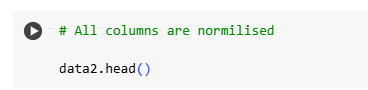

In [ ]:
data2.head()

In [ ]:
#

__________________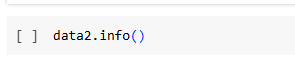

In [ ]:
data2.info()

In [ ]:
#

### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Reducing memory size

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
                'Volume_Delta', 'Volume_Delta_abs',
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



__________________________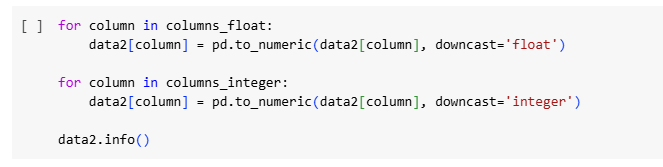

In [ ]:
for column in columns_float:
  data2[column] = pd.to_numeric(data2[column], downcast='float')

for column in columns_integer:
  data2[column] = pd.to_numeric(data2[column], downcast='integer')

data2.info()


In [ ]:
#

We reduced the data memory by more than 2 times: from 5.4 MB to 2.5 MB

____________________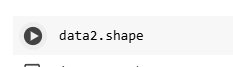

In [ ]:
data2.shape

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# inverse normalisation of price deltas, the minimum difference is more interesting

fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

### Date transformation


In [ ]:
# We will predict Wait-Attention modes
# Since we have a 5-minute dataset, Then we will shift MiN & MAX prices by 48 rows, which is 4 hours forward

_____________________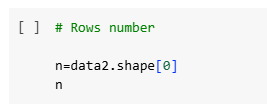

In [ ]:
n=data2.shape[0]
n

In [ ]:
#

___________________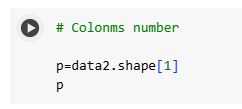

In [ ]:
p=data2.shape[1]
p

In [ ]:
#

_____________________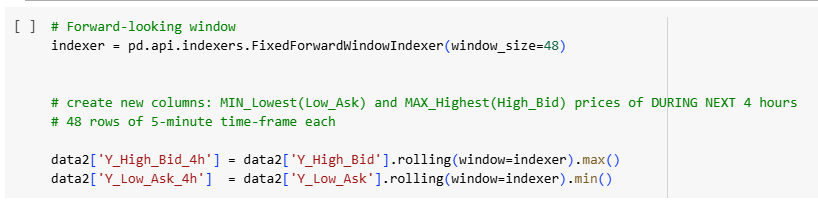

In [ ]:
indexer = pd. api.indexers. FixedForwardWindowIndexer(window_size=48)

data2['Y_High_Bid_4h'] = data2['Y_High_Bid']. rolling(window=indexer) .max()
data2['Y_Low_Ask_4h'] = data2['Y_Low_Ask' ].rolling(window=indexer) .min()

In [ ]:
#

________________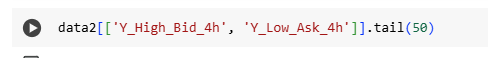

In [ ]:
data2[['Y_High_Bid_4h', 'Y_Low_Ask_4h' ]].tail(50)

In [ ]:
#

_________________________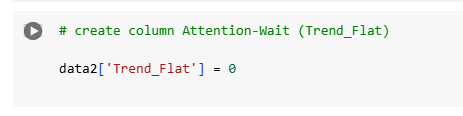

In [ ]:
data2['Trend_Flat'] = 0

In [ ]:
#


<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Fill in "1s" If the movement (in any direction) within 4 hours is more than $10 (0.01 after the normalisation)

data2.loc[ (data2["Y_High_Bid_4h"] - data2["Close_Ask"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

data2.loc[ (data2["Close_Bid"] - data2["Y_Low_Ask_4h"]) >= 0.01, 'Trend_Flat'] = 1
print( data2['Trend_Flat'].sum() )

In [ ]:
print(((data2["Y_High_Bid_4h"] - data2["Close_Ask"])>= 0.01).sum())
print(((data2["Close_Bid"] - data2["Y_Low_Ask_4h"])>= 0.01).sum())

In [ ]:
# (5767+5450) = 11217
# 11217-10758 = 459       # rows after which the price moved in both directions by $10 or more

__________________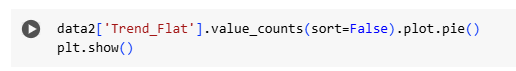

In [ ]:
data2["Trend_Flat"].value_counts(sort=False).plot.pie()
plt.show()

In [ ]:
#

In [ ]:
# The dataset is unbalanced

____________________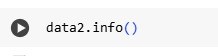

In [ ]:
data2.info()

In [ ]:
#

_____________________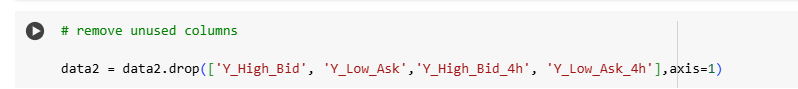

In [ ]:
data2 = data2.drop(['Y_High_Bid', 'Y_Low_Ask', 'Y_High_Bid_4h', 'Y_Low_Ask_4h' ], axis=1)

In [ ]:
#

__________________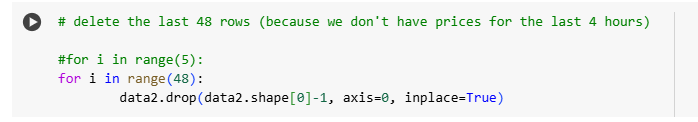

In [ ]:
for i in range(48):
  data2.drop(data2.shape[0]-1, axis=0, inplace=True)

In [ ]:
#

____________________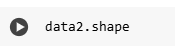

In [ ]:
data2. shape

In [ ]:
#

_______________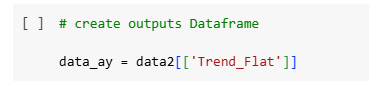

In [ ]:
data_ay = data2[["Trend_Flat"]]

In [ ]:
#

__________________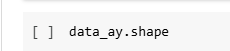

In [ ]:
data_ay.shape

In [ ]:
#

_________________________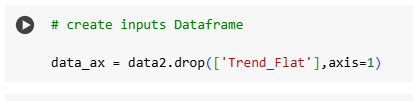

In [ ]:
data_ax = data2.drop(['Trend_Flat'],axis=1)

In [ ]:
#

______________________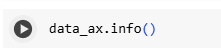

In [ ]:
data_ax.info()

In [ ]:
#

____________________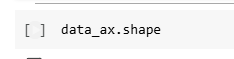

In [ ]:
data_ax.shape

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Create inputs Numpy

data_a = np.array(data_ax)

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])
    print('\n')
    print(data_a[-2:,:])

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype)


In [ ]:
# Create outputs Numpy

data_y = np.array(data_ay)

print("data_a:")
print(data_y[:3,:])
print('\n')
print(data_y[-3:,:])

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype)

____________________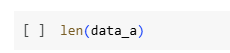

In [ ]:
len(data_a)

In [ ]:
#

#### Create the 3D inputs tensor, and 2D outputs matrix

In [ ]:
# Analysis of the entire dataset would take a long time,
# so, please reduce the dataset by about 3 times to 12000 rows

# n_small = 12000 rows (5-minutes), which is around 2 months.

In [ ]:
# We need a three-dimensional data tensor: [(n_small-N ), N, 18] and
# one-dimensional array of answers [(n_small-N ), 1] with the High and Low prices DURING the next 5 minutes

# where N=50 is the number of minutes for analysis at each step; those are looking backwards

# Therefore, we need:
# three-dimensional data tensor of sliced graphs [(n_small - N - 5), N, 18] and
# two-dimensional matrix of answers Y[(n_small - N - 5), 2]
# with the Trend-Flat indicator, indicating whether take profit will be reached within 4 hours or not

___________________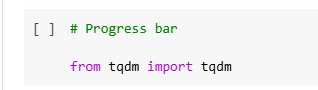

In [ ]:
from tqdm import tqdm

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 4 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# n_small = len(data_y)

n_small = 12000    # reduce the dataset size

N=50               # sliding window depth

L=n_small-N        # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L,N,t)


In [ ]:
# create imputs zeros 3D tensors with 'float32'

data_b = np.zeros( (L, N, t), dtype= 'float32' )

In [ ]:
# create a one-dimensional zeros vector of answers

Y = np.zeros((L, 1), dtype= 'float32')  # We will predict Attention - Wait for signals

In [ ]:
# fill the imputs 3D tansor (data_b)
# and the array of answers Y


print('L = n_small - N = ', n_small-N, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]

    Y[k,0] = data_y[k+N-1,0]   # Trend-Flat signal

print(k)                       # index value (for control)

print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

________________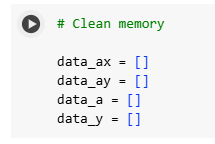

In [ ]:
data_ax = []
data_ay = []
data_a = []
data_y = []

In [ ]:
#

### Train Test Split
- 90% for training and validation
- 10% for testing

________________________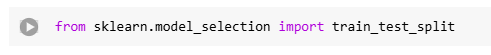

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#

<html> <h3 style="font-style:bold; color:red;"> !!! Use parameters: shuffle = False, stratify = None

Otherwise, the whole time series will be mixed up!
</h3> </html>

_________________________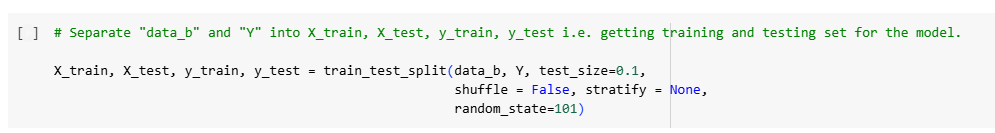

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle = False, stratify = None,random_state=101)

In [ ]:
#

___________________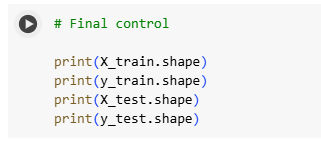

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#

#### Balancing Classes in the Dataset

In [ ]:
# Use class weights (class_weight) in the fit method to make the model "pay more attention" to the smaller class.

__________________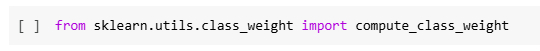

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
#

_____________________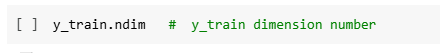

In [ ]:
y_train.ndim

In [ ]:
#

_____________________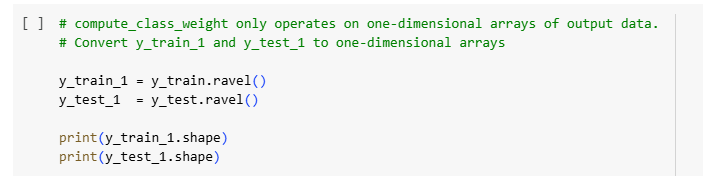

In [ ]:
y_train_1 = y_train.ravel()
y_test_1 = y_test.ravel()

print(y_train_1.shape)
print(y_test_1.shape)

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_1), y=y_train_1)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

____________________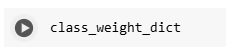

In [ ]:
class_weight_dict

In [ ]:
#

### Training

#### LSTM

____________________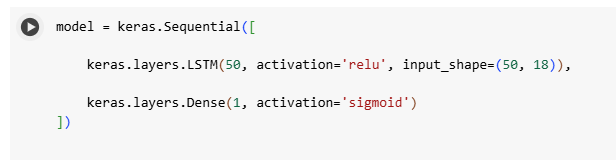

In [ ]:
model = keras.Sequential([keras.layers.LSTM(50, activation='relu', input_shape=(50, 18)),keras.layers.Dense(1, activation='sigmoid')])


In [ ]:
#

________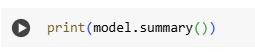

In [ ]:
print(model.summary())

In [ ]:
#

_________________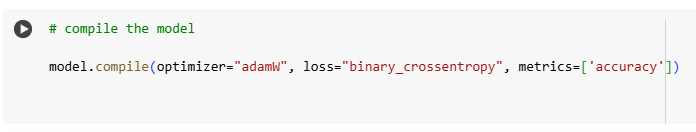

In [ ]:
model.compile(optimizer="adamW", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
#


#### Callbacks

________________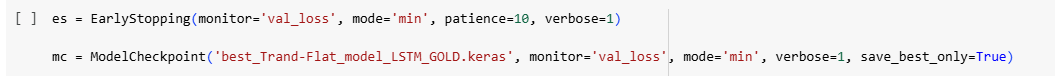

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
mc = ModelCheckpoint('best_Trand-Flat_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
#

<html> <h4 style="font-style:bold; color:blue;"> If you are using your own laptop without a GPU (Graphics processing unit) and outiside of the Google Colab,

please change the following parameter in the next cell
</h4> </html>

<html> <h4 style="font-style:bold; color:red;">
epochs=10
</h4> </html>


_________________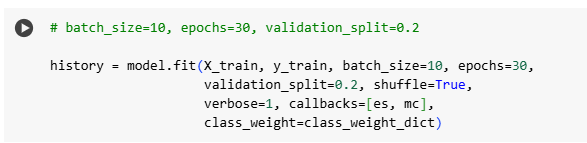

In [ ]:
history = model. fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.2, shuffle=True, verbose=1, callbacks=[es, mc], class_weight=class_weight_dict)


In [ ]:
#

_______________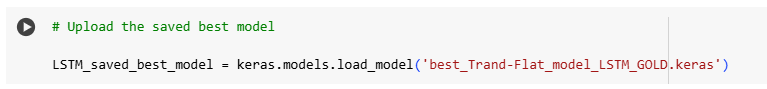

In [ ]:
LSTM_saved_best_model = keras.models.load_model('best_Trand-Flat_model_LSTM_GOLD.keras')

In [ ]:
#

#### Test

___________________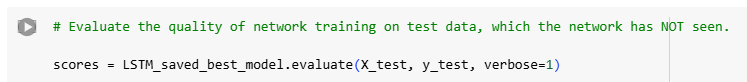

In [ ]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)


In [ ]:
#

______________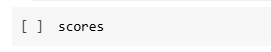

In [ ]:
scores

In [ ]:
#

### Visualisation

### Hint:

You can copy many blocks of text in the cells from the previous 2 weeks of practice sessions.
Some are easy enough to copy, some need to be slightly modified. In any case, this can speed up your code creation.

#### Loss function graphs during training

______________________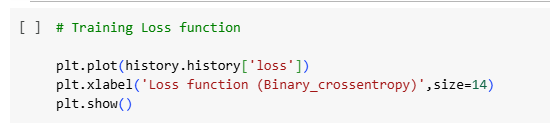

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Loss function (Binary_crossentropy)', size=14)
plt.show()


In [ ]:
#

__________________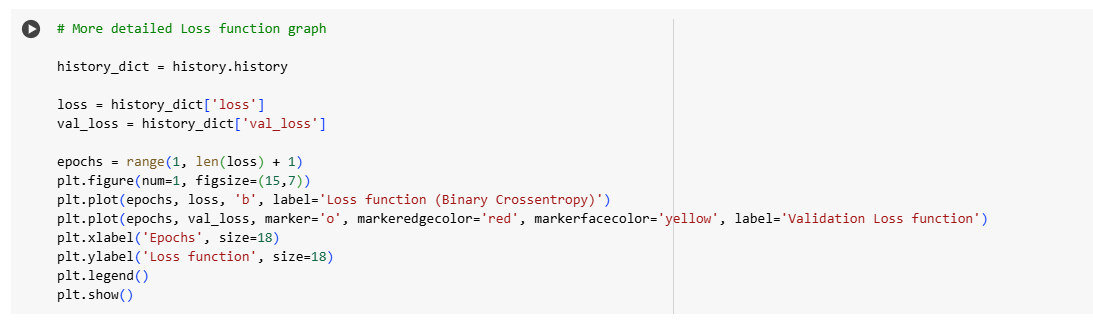

In [ ]:
history_dict = history.history

loss = history_dict[ 'loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, loss, 'b', label='Loss function (Binary Crossentropy)')
plt.plot(epochs, val_loss, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Loss function')
plt.xlabel('Epochs', size=18)
plt.ylabel('Loss function', size=18)
plt.legend()
plt.show()


In [ ]:
#

____________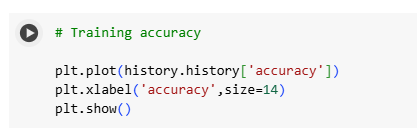

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy', size=14)
plt.show()


In [ ]:
#

____________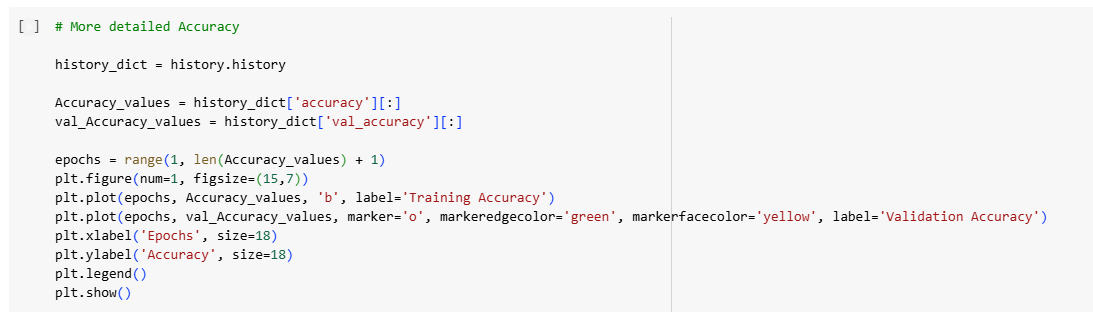

In [ ]:
history_dict = history.history

Accuracy_values = history_dict['accuracy'] [:]
val_Accuracy_values = history_dict['val_accuracy'][:]

epochs = range(1, len(Accuracy_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, Accuracy_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_Accuracy_values, marker='o', markeredgecolor='green', markerfacecolor='yellow', label='Validation Accuracy')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy', size=18)
plt.legend()
plt. show()


In [ ]:
#

_________________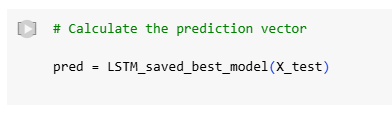

In [ ]:
pred = LSTM_saved_best_model(X_test)

In [ ]:
#

______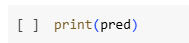

In [ ]:
print(pred)

In [ ]:
#

______________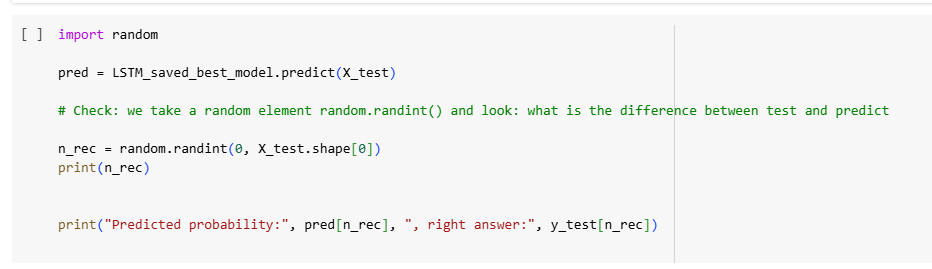

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pred = LSTM_saved_best_model.predict(X_test)

n_rec = random.randint(0, X_test.shape[0])
print(n_rec)

print("Predicted probability:", pred[n_rec], ", right answer:", y_test[n_rec])


In [ ]:
#

______________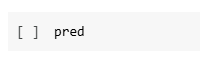

In [ ]:
pred

In [ ]:
#

______________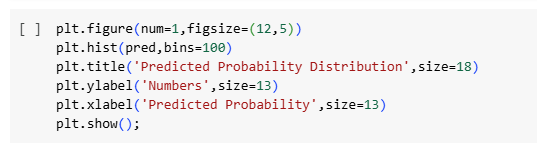

In [ ]:
plt.figure(num=1,figsize=(12,5))
plt.hist(pred, bins=100)
plt. title('Predicted Probability Distribution', size=18)
plt.ylabel('Numbers', size=13)
plt.xlabel('Predicted Probability', size=13)
plt.show();


In [ ]:
#

_______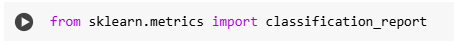

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#

_____________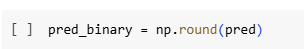

In [ ]:
pred_binary = np.round(pred)

In [ ]:
#

_________________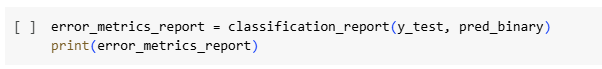

In [ ]:
error_metrics_report = classification_report(y_test, pred_binary)
print(error_metrics_report)

In [ ]:
#

### Neural Network Hyperparameters' Optimisation

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
pip install keras_tuner

_________________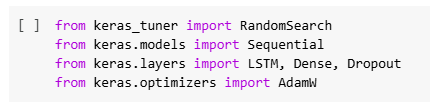

In [ ]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras. layers import LSTM, Dense, Dropout
from keras.optimizers import AdamW

In [ ]:
#

_____________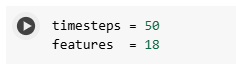

In [ ]:
timesteps = 50
features = 18

In [ ]:
#

_______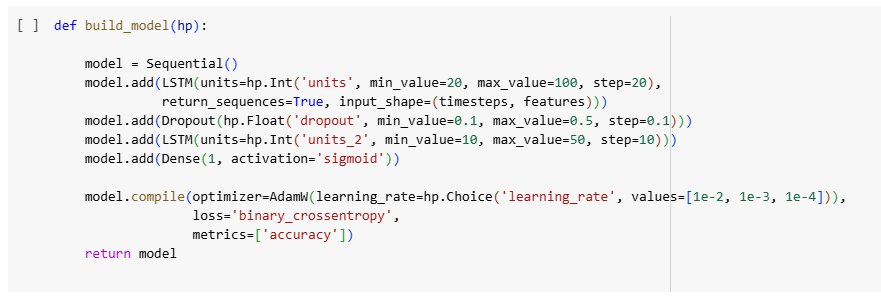

In [ ]:
def build_model(hp):

  model = Sequential()
  model.add(LSTM(units=hp.Int('units', min_value=20, max_value=100, step=20), return_sequences=True, input_shape=(timesteps, features)))
  model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
  model.add(LSTM(units=hp.Int('units_2', min_value=10, max_value=50, step=10)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=AdamW(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy' ,  metrics=['accuracy'])

  return model

In [ ]:
#

__________________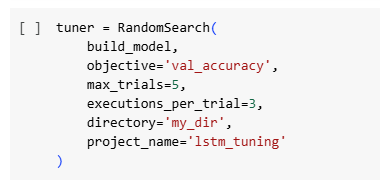

In [ ]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='lstm_tuning')

In [ ]:
#

___________________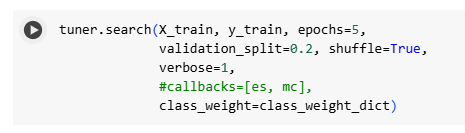

In [ ]:
tuner. search(X_train, y_train, epochs=5, validation_split=0.2, shuffle=True, verbose=1, class_weight=class_weight_dict)

In [ ]:
#

__________________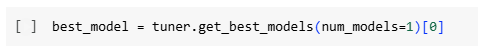

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
#

_________________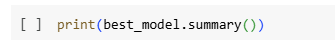

In [ ]:
print(best_model.summary())

In [ ]:
#

# Lab Logbook Requirement:

<html> <h3 style="; color:blue;">
   
1) Modify the training parameter of the optimised best LSTM model using the following formulas:

Modify the number of epochs:
Z + 30
, where your SID is: XXXXXXZ

Modify the batch_size:
Z + 10
, where your SID is: XXXXXXZ

2) Leave other parameters the same as in the practical session.
3) Use EarlyStopping() and ModelCheckpoint() functions.
4) Train the optimised best LSTM model with the same datasets and your training parameters.
5) Calculate and demonstrate the received test Accuracy and other error metrics for the classification task.
6) Plot the "More detailed Accuracy" graph.
7) Please only add to your Lab Logbook print-screens of:
- code your Use EarlyStopping() and ModelCheckpoint() functions
- code and training result using model.fit()
- the resulting test Accuracy and other error metrics for the classification task using classification_report().
- Accuracy detailed graph
    
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.
</h3> </html>